<a href="https://colab.research.google.com/github/jh941213/MachineLearning/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #모든 특성을 평균을 0으로 표준편차를 1로 변환
from sklearn.preprocessing import StandardScaler
#특성 중 가장 작은 값을 0, 가장 큰 값을 1로 변환하여 0~1사이의 값을 만듬
from sklearn.preprocessing import MinMaxScaler
#중앙 값과 사분위 값을 사용하여 중앙값을 빼고, 사분위 값으로 나눔
#이상치의 영향을 최소화 할 수 있음
from sklearn.preprocessing import RobustScaler


In [ ]:
#피쉬데이터 가져오기
import pandas as pd

fish = pd.read_csv("fish.csv")
#데이터 분할
bream = fish[fish['class']== 1]
smelt = fish[fish['class']== 0]


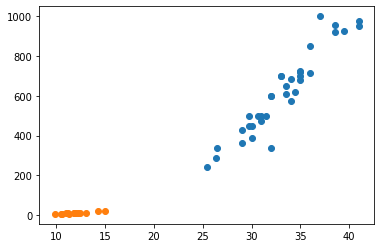

In [ ]:
import matplotlib.pyplot as plt
# 그림 그리기 x축 length y축 weight
plt.scatter(bream['length'], bream['weight'])
plt.scatter(smelt['length'], smelt['weight'])
#길이가 25, 무게가 150 

plt.scatter(25, 150, maker = '^') #도미데이터

In [ ]:
#문제집 생성
data = fish[['length','weight']].to_numpy()

In [ ]:
#정답지 생성
target = fish['class'].to_numpy()
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
#훈련데이터의 문제지,시험데이터 문제지 , 훈련데이터 정답지,시험데이터 정답지
train_input, test_input, train_target, test_target = train_test_split(data, target)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_input,train_target)
knn.score(test_input, test_target)

1.0

In [ ]:
knn.predict([[25,150]])
#도미데이터가 아닌 빙어의 클래스 0 으로 출력함
#틀린이유 : 눈으로는 길이데이터가 도미와 가까워 보이나 실은 빙어와 더가까움
#그래서 표준화를 해야함

array([0])

In [ ]:
import numpy as np
#평균
mean = np.mean(train_input, axis=0) # axis 행방향
mean
#표준편차
std = np.std(train_input, axis=0) # 

train_scaled=(train_input - mean) / std
test_scaled =(test_input - mean)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_target)
knn.score(test_scaled, test_target)

0.7692307692307693

In [ ]:
new = ([25,150]- mean) /std
new


array([-0.26515804, -1.015552  ])

In [ ]:
knn.predict([new])

array([1])